In [1]:
from __future__ import division
from pylab import *
import skimage as ski
from skimage import data, io, filters, exposure,measure,feature
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray,gray2rgb
from skimage.filters import *
from matplotlib import pylab as plt
from skimage.morphology import watershed
import scipy as sci
import numpy as np
from scipy import ndimage as ndi
from numpy import array
from skimage.measure import label
from skimage import data, util
io.use_plugin('matplotlib')

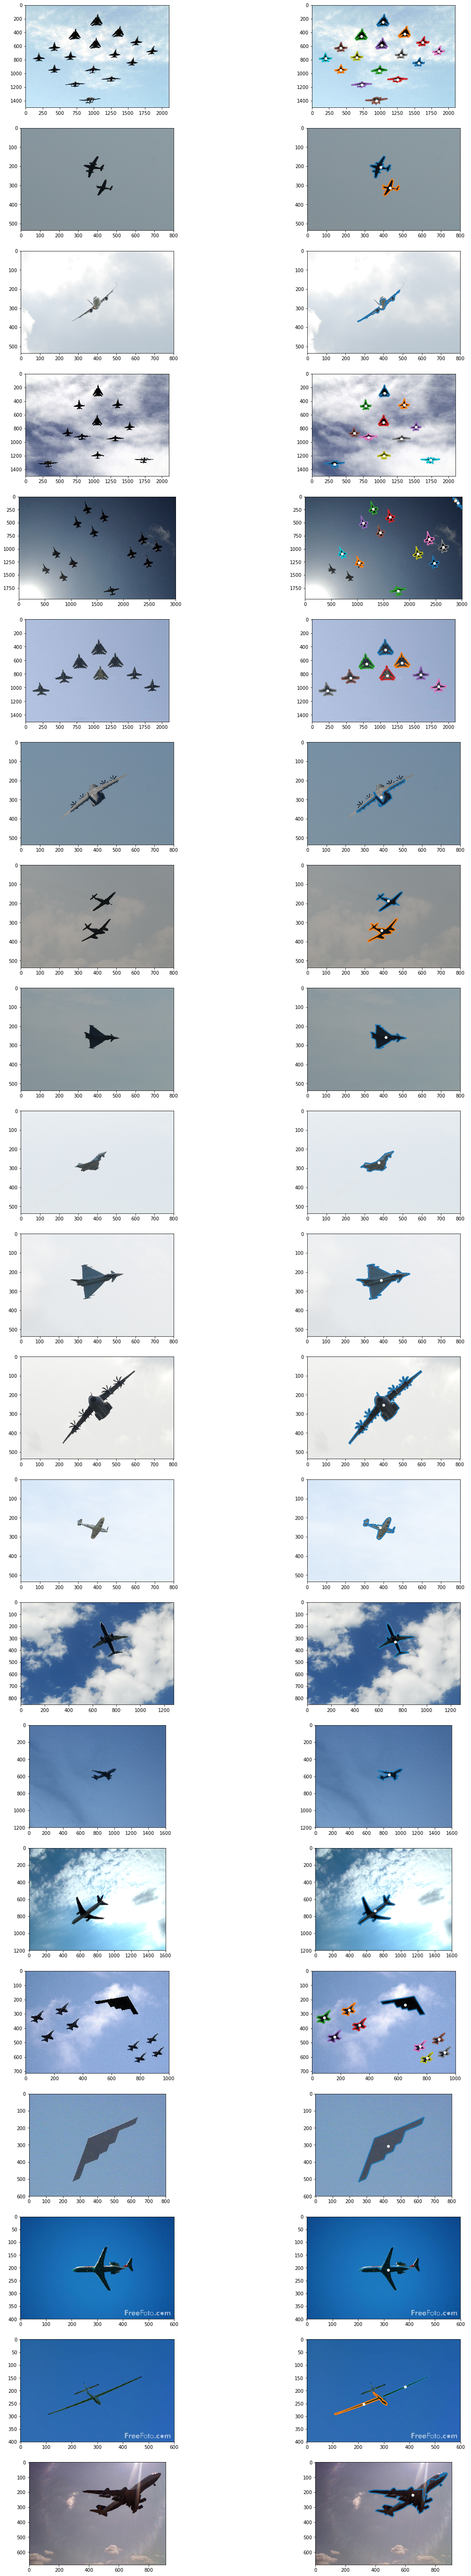

<Figure size 432x288 with 0 Axes>

In [2]:
listaNazw = []
for i in range(21):
    nazwa = ""
    if i < 10:
        nazwa = "0"
    listaNazw.append("photos/samolot" + nazwa + str(i) + ".jpg")
    
tempLista = ['photos/samolot04.jpg','photos/samolot06.jpg','photos/samolot20.jpg','photos/samolot19.jpg']

fig = plt.figure(figsize=(20, 100))
i = 1
for nazwa in listaNazw:
    org = io.imread(nazwa)
    org = img_as_float(org)
    img = rgb2gray(org)
    
    img = exposure.adjust_gamma(img, 2)
    img1 = img
    
    MIN = np.percentile(img, 0)
    MAX = np.percentile(img, 10)
    img = (img - MIN) / (MAX - MIN)
    img[img > 1] = 1
    img[img < 0] = 0
    
    
    img = mp.erosion(img) 
    img2 = img
    
    img[img > 0.4] = 1
    img[img < 0.4] = 0
    img3 = img
    
    contours = measure.find_contours(img, 0.9)
    
    ax=fig.add_subplot(21, 2, i)
    plt.imshow(org)
    i = i + 1
    
#     ax=fig.add_subplot(4, 5, i)
#     plt.imshow(img1, cmap = 'gray')
#     i = i + 1
    
#     ax=fig.add_subplot(4, 5, i)
#     plt.imshow(img2, cmap = 'gray')
#     i = i + 1
    
#     ax=fig.add_subplot(4, 5, i)
#     plt.imshow(img3, cmap = 'gray')
#     i = i + 1
    
    ax = fig.add_subplot(21, 2, i)
    plt.imshow(org)
    
    ax.axis('image')
    for n, contour in enumerate(contours):
        if(len(contour)>400):
            centroid = np.sum(contour, axis=0)/len(contour)
            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
            ax.plot(centroid[1], centroid[0], marker='o', markersize=5, color="white")
    i=i+1
io.show()
plt.savefig("samoloty.pdf")